# Load datafile "News_Sentiments_India.csv" for necessary data wrangling.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [36]:
file='/content/drive/MyDrive/News_Sentiments_India.csv'

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv(file)


In [38]:
data.drop(['URL'],axis=1,inplace=True)

In [39]:
data.head()
data.columns=['Date','Headline']
data['Date']=pd.to_datetime(data['Date'])

In [7]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [40]:
#NLP packages
import nltk
import spacy
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
lemma = WordNetLemmatizer()
nltk.download('stopwords')
stop_words = stopwords.words('english')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Run an NLP algorithm/model of your choice on the dataset to create sentiments on new headlines.

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer

def create_sentiments(data):
    analyzer = SentimentIntensityAnalyzer()
    sentiments = []
    for index, row in data.iterrows():
        sentiment = analyzer.polarity_scores(row['Headline'])['compound']
        if sentiment >= 0.05:
            sentiments.append("Positive")
        elif sentiment <= -0.05:
            sentiments.append("Negative")
        else:
            sentiments.append("Neutral")
    data['Sentiments'] = sentiments
    return data

In [42]:
df=create_sentiments(data)

In [43]:
df.head()

,Date,Headline,Sentiments
0,2017-05-01,Eliminating shadow economy to have positive im...,Positive
1,2017-05-01,Two Chinese companies hit roadblock with India...,Neutral
2,2017-05-01,SoftBank India Vision gets new $100,Positive
3,2017-05-01,Nissan halts joint development of luxury cars ...,Neutral
4,2017-05-01,Despite challenges Rajasthan continues to prog...,Positive


In [15]:
import yfinance as yf

# 5.Backtest the filtered news headline data by using yfinance api (https://pypi.org/project/yfinance/) or a dataset of your choice having the closing prices for "NSE: RELIANCE" stock for the date range in the "News_Sentiments_India.csv" file mentioned above. 

In [16]:
def filter_news_headlines(data):
    data = data[data['Headline'].str.contains("Mukesh Ambani|Reliance|RIL|Jio", na=False)]
    return data

def backtest_data(data, symbol):
    stock_data = yf.download(symbol, start="2017-04-01", end="2021-11-04")
    stock_data = stock_data[['Close']]
    
    stock_data['Date'] = stock_data.index

    stock_data.reset_index(inplace=True, drop=True)
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).astype('datetime64[ns]')
    stock_data['Date'] = stock_data['Date'].astype(str).str.split(" ").str[0].astype('datetime64[ns]')
    merged_data = pd.merge(data, stock_data, on='Date', how='left')
    return merged_data,stock_data

In [17]:
filtered_df=filter_news_headlines(df)

In [18]:
symbol='RELIANCE.NS '
pf,mf=backtest_data(filtered_df, symbol)

[*********************100%***********************]  1 of 1 completed


<ipython-input-16-f6a28272365a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = stock_data.index
<ipython-input-16-f6a28272365a>:12: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  stock_data['Date'] = pd.to_datetime(stock_data['Date']).astype('datetime64[ns]')
<ipython-input-16-f6a28272365a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [19]:
pf

,Date,Headline,Sentiments,Close
0,2017-04-01,"Sensex , Nifty50 end flat after choppy trade ;...",Neutral,NaN
1,2017-12-01,Ratan Tata and Mukesh Ambani keen to invest in...,Positive,NaN
2,2017-12-01,Reliance Mutual Fund to launch part II of CPSE...,Neutral,NaN
3,2017-11-01,"Reliance , govt headed for a long battle in KG...",Negative,937.711426
4,2017-11-01,Reliance Jio to cover all of Gujarat with 4G n...,Neutral,937.711426
...,...,...,...,...
2578,2021-05-04,RIL plans global payments play via NUE,Positive,1920.099976
2579,2021-02-04,"Jio aggressive strategy , launch of low - cost...",Negative,1923.750000
2580,2021-05-04,"RIL , Google , Facebook to be pitted against V...",Neutral,1920.099976
2581,2021-05-04,Share Market LIVE Updates : Sensex Nifty to op...,Positive,1920.099976


In [20]:
pf.dropna(inplace=True)

In [23]:
pf

,Date,Headline,Sentiments,Close
3,2017-11-01,"Reliance , govt headed for a long battle in KG...",Negative,937.711426
4,2017-11-01,Reliance Jio to cover all of Gujarat with 4G n...,Neutral,937.711426
26,2017-08-02,﻿M P Birla Group company Birla Corporation inv...,Neutral,817.302795
27,2017-08-02,Birla Corp invests Rs 100 cr in Reliance Cemen...,Neutral,817.302795
31,2017-11-02,Reliance Communications posts a net loss of Rs...,Negative,936.423645
...,...,...,...,...
2577,2021-03-31,"reliance industries : Play OMCs via Reliance ,...",Positive,2021.849976
2578,2021-05-04,RIL plans global payments play via NUE,Positive,1920.099976
2579,2021-02-04,"Jio aggressive strategy , launch of low - cost...",Negative,1923.750000
2580,2021-05-04,"RIL , Google , Facebook to be pitted against V...",Neutral,1920.099976


In [21]:
def plot_bar_chart(data, date_offset):
    data = data[:50]
    data['Price Change'] = data['Close'].shift(-date_offset) - data['Close']
    data['Price Change'] = data['Price Change'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
    plot_data = data[['Sentiments', 'Price Change']]
    plot_data = plot_data.groupby(['Sentiments', 'Price Change']).size().reset_index(name='Counts')
    plot_data = plot_data.pivot(index='Sentiments', columns='Price Change', values='Counts')
    plot_data.plot(kind='bar', stacked=True)
    plt.show()

# 6. Plot bar chart of 50 data points comparing sentiment from news headlines against RELIANCE stock closing price[red or green] on the day the news came out.

#7. Plot bar chart of the same 50 data points used above comparing sentiment from news headlines against RELIANCE stock closing price [red or green] for the day after the news came out.

<ipython-input-21-ecb778010fb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Change'] = data['Close'].shift(-date_offset) - data['Close']
<ipython-input-21-ecb778010fb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Change'] = data['Price Change'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')


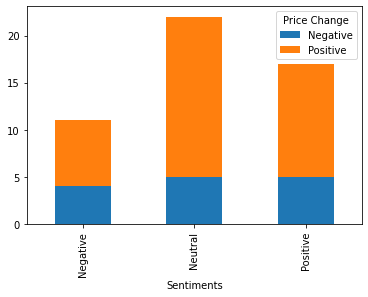

In [22]:
plot_bar_chart(pf,1)

# 

In [44]:
df['Sentiments'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [45]:
df['Sentiments']=df['Sentiments'].map({'Neutral':0,'Positive':1,'Negative':-1})

In [46]:
df

,Date,Headline,Sentiments
0,2017-05-01,Eliminating shadow economy to have positive im...,1
1,2017-05-01,Two Chinese companies hit roadblock with India...,0
2,2017-05-01,SoftBank India Vision gets new $100,1
3,2017-05-01,Nissan halts joint development of luxury cars ...,0
4,2017-05-01,Despite challenges Rajasthan continues to prog...,1
...,...,...,...
200495,2021-12-04,"Realme 8 5G launch date announced , specificat...",0
200496,2021-11-04,"Bitcoin resurges beyond $60 , 000 over reports...",-1
200497,2021-11-04,FPIs withdraw Rs 929 cr from Indian markets so...,0
200498,2021-11-04,"Google confirms Pixel 5a 5G is not cancelled ,...",1


In [47]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [48]:
def text_prep(x):
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
    
     return lemmatize

In [49]:
preprocess_tag = [text_prep(i) for i in df['Headline']]
df["preprocess_txt"] = preprocess_tag

In [51]:
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))

In [53]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [65]:
file = open('/content/gdrive/MyDrive/findb.ai/negative-words.txt', 'r')
neg_words = file.read().split()
file = open('/content/gdrive/MyDrive/findb.ai/positive-words.txt', 'r')
pos_words = file.read().split()

In [58]:
num_pos=df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg =df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg

# 3. Create a confidence score for each news headline sentiment (you can do this individually for positive, neutral and negative or an overall confidence score with the label). 

3. Create a confidence score for each news headline sentiment (you can do this individually for positive, neutral and negative or an overall confidence score with the label). 

In [59]:
df['Confidence_score'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)

In [60]:
df.head()

,Date,Headline,Sentiments,preprocess_txt,total_len,pos_count,neg_count,Confidence_score
0,2017-05-01,Eliminating shadow economy to have positive im...,1,"[eliminating, shadow, economy, positive, impac...",8,1,1,0.00
1,2017-05-01,Two Chinese companies hit roadblock with India...,0,"[two, chinese, company, hit, roadblock, indian...",7,1,1,0.00
2,2017-05-01,SoftBank India Vision gets new $100,1,"[softbank, india, vision, get, new]",5,0,0,0.00
3,2017-05-01,Nissan halts joint development of luxury cars ...,0,"[nissan, halt, joint, development, luxury, car...",8,1,0,0.12
4,2017-05-01,Despite challenges Rajasthan continues to prog...,1,"[despite, challenge, rajasthan, continues, pro...",7,1,0,0.14


In [61]:
searchwords = ["Mukesh Ambani", "Reliance", "RIL", "Jio"]
df3=df[df['Headline'].str.startswith(tuple(searchwords))]

In [63]:
df4=df3[['Date','Headline','Sentiments','Confidence_score']]

# .Filter out news headlines that only have the keywords ["Mukesh Ambani", "Reliance", "RIL", "Jio"]

In [64]:
df4

,Date,Headline,Sentiments,Confidence_score
1254,2017-12-01,Reliance Mutual Fund to launch part II of CPSE...,0,0.00
1397,2017-11-01,"Reliance , govt headed for a long battle in KG...",-1,-0.14
1580,2017-11-01,Reliance Jio to cover all of Gujarat with 4G n...,0,0.00
2034,2017-01-16,Mukesh Ambani ploughs $4 . 4 billion more in R...,-1,0.11
2077,2017-01-17,Reliance shares dip 3 % post Q3 earnings,1,0.00
...,...,...,...,...
198991,2021-03-25,Reliance to sell partial stake in Den Networks...,0,0.00
199608,2021-05-04,RIL plans global payments play via NUE,1,0.00
199686,2021-02-04,"Jio aggressive strategy , launch of low - cost...",-1,-0.08
199783,2021-05-04,"RIL , Google , Facebook to be pitted against V...",0,0.00
